In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [26]:
train = pd.read_csv('/home/necati/machine_learning/Kaggle/Kaggle_datasets/trainSpaceship.csv')
test = pd.read_csv('/home/necati/machine_learning/Kaggle/Kaggle_datasets/testSpaceship.csv')

In [27]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: xlabel='VRDeck', ylabel='Count'>

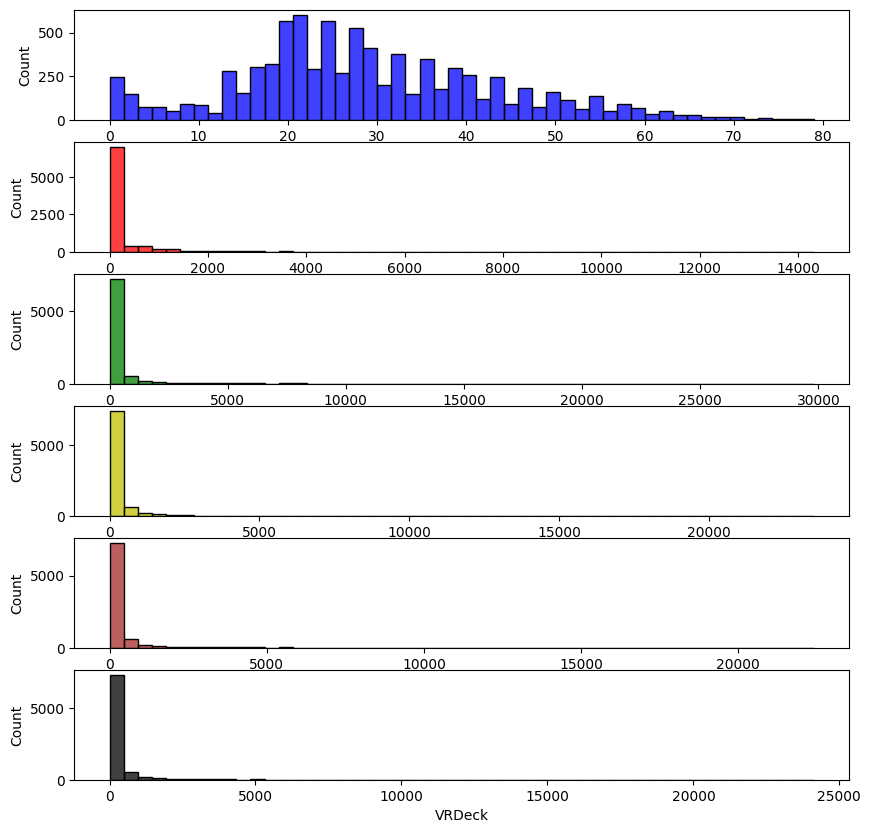

In [28]:
fig, ax = plt.subplots(6, 1, figsize=(10,10))
sns.histplot(train['Age'], color='b', bins= 50, ax=ax[0])
sns.histplot(train['RoomService'], color='r', bins=50, ax= ax[1])
sns.histplot(train['FoodCourt'], color='g', bins=50, ax=ax[2])
sns.histplot(train['ShoppingMall'], color='y', bins=50, ax=ax[3])
sns.histplot(train['Spa'], color='brown', bins=50, ax = ax[4])
sns.histplot(train['VRDeck'], color='black', bins=50, ax=ax[5])

In [29]:
train[['Deck', 'Cabin_num', 'Side']] = train['Cabin'].str.split('/', expand=True)
train = train.drop('Cabin',axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


<Axes: xlabel='Side', ylabel='Count'>

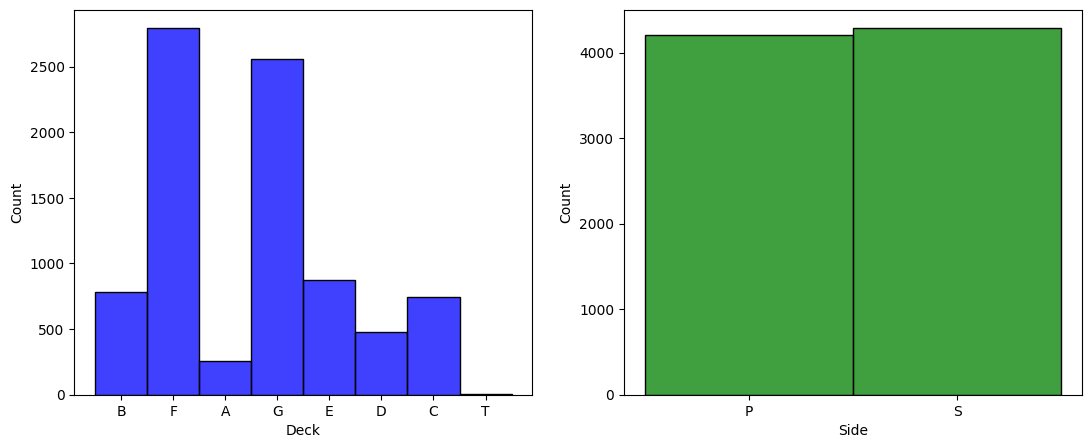

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))
sns.histplot(train['Deck'], color='blue', bins=50, ax=ax[0])
sns.histplot(train['Side'], color='green', bins=50, ax=ax[1])

In [31]:
train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train[['VIP', 'CryoSleep']] = train[['VIP', 'CryoSleep']].astype(int)

In [32]:
train = train.drop(columns=['Name', 'PassengerId'], axis=1)

In [33]:
train.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin_num       199
Side            199
Deck            199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
VRDeck            0
Spa               0
ShoppingMall      0
Transported       0
dtype: int64

In [34]:
def train_val_split(df, test_ratio = 0.20):
    val_indices = np.random.rand(len(df)) < test_ratio
    return df[~val_indices], df[val_indices]

In [35]:
train['Transported'] = train['Transported'].astype(int)

In [36]:
training_data_pd, validation_data_pd = train_val_split(train)
print(len(training_data_pd), len(validation_data_pd))

7029 1664


In [37]:
training_data = tfdf.keras.pd_dataframe_to_tf_dataset(training_data_pd, label='Transported')
validation_data = tfdf.keras.pd_dataframe_to_tf_dataset(validation_data_pd, label='Transported')

In [38]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [39]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=['accuracy'])

Use /tmp/tmp3hw6zw7c as temporary training directory


In [40]:
rf.fit(x=training_data)

Reading training dataset...
Training dataset read in 0:00:00.303424. Found 7029 examples.
Training model...


I0000 00:00:1742481252.239491    8352 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1742481252.239514    8352 kernel.cc:783] Collect training examples
I0000 00:00:1742481252.239525    8352 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1742481252.239590    8352 kernel.cc:401] Number of batches: 8
I0000 00:00:1742481252.239595    8352 kernel.cc:402] Number of examples: 7029
I0000 00:00:1742481252.242180    8352 data_spec_inference.cc:354] 1261 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Cabin_num (487 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:

Model trained in 0:00:26.864287
Compiling model...


I0000 00:00:1742481279.050152    8352 decision_forest.cc:808] Model loaded with 300 root(s), 235088 node(s), and 13 input feature(s).
I0000 00:00:1742481279.050194    8352 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-03-20 17:34:39.050208: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [41]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

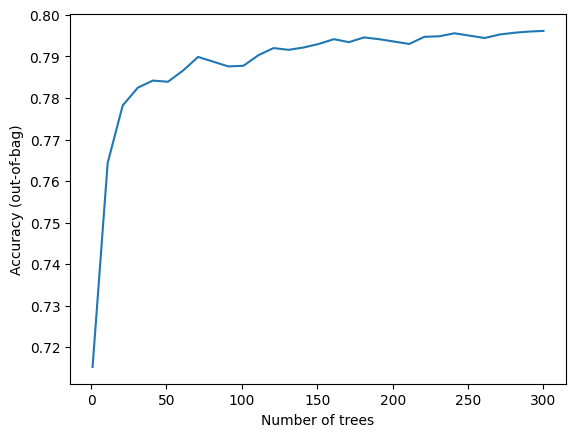

In [42]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [43]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=7029, accuracy=0.7961303172570778, loss=0.5281466816707403, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [44]:
evaluation = rf.evaluate(x=validation_data,return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 68ms/step - loss: 0.0000e+00 - accuracy: 0.8071
loss: 0.0000
accuracy: 0.8071


In [45]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [46]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 120.0),
 ("RoomService" (1; #7), 74.0),
 ("Spa" (1; #10), 46.0),
 ("VRDeck" (1; #12), 32.0),
 ("ShoppingMall" (1; #8), 16.0),
 ("FoodCourt" (1; #5), 8.0),
 ("Deck" (4; #3), 3.0),
 ("HomePlanet" (4; #6), 1.0)]